In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import operator

## I HAVEF TO WORK ON THIS
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


## Data

In [7]:
csv_path = r"C:\Users\sofia.martinez_bluet\Downloads\bottle.csv"

# Verificar si el archivo existe en la ruta especificada
if os.path.exists(csv_path):
    # Leer el archivo CSV
    data = pd.read_csv(csv_path)
    # Mostrar las primeras filas del DataFrame para verificar
    print(data.head())
else:
    print(f"El archivo {csv_path} no se encuentra en la ruta especificada.")

   Cst_Cnt  Btl_Cnt       Sta_ID                                Depth_ID  \
0        1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0000A-3   
1        1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0008A-3   
2        1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0010A-7   
3        1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0019A-3   
4        1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0020A-7   

   Depthm  T_degC  Salnty  O2ml_L  STheta  O2Sat  ...  R_PHAEO  R_PRES  \
0       0   10.50  33.440     NaN  25.649    NaN  ...      NaN       0   
1       8   10.46  33.440     NaN  25.656    NaN  ...      NaN       8   
2      10   10.46  33.437     NaN  25.654    NaN  ...      NaN      10   
3      19   10.45  33.420     NaN  25.643    NaN  ...      NaN      19   
4      20   10.45  33.421     NaN  25.643    NaN  ...      NaN      20   

   R_SAMP  DIC1  DIC2  TA1  TA2  pH2  pH1  DIC Quality Comment  
0     NaN   NaN   NaN  NaN  NaN  

In [8]:
data.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
count,500.000000,500.000000,500.000000,499.000000,494.000000,0.0,493.000000,0.0,0.0,0.0,...,0.0,500.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,8.548000,250.500000,341.490000,7.850421,33.628842,NaN,26.183400,NaN,NaN,NaN,...,NaN,344.114000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.570062,144.481833,355.166886,2.911584,0.560411,NaN,0.846325,NaN,NaN,NaN,...,NaN,358.371094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,0.000000,2.780000,32.630000,NaN,24.870000,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.000000,125.750000,55.000000,5.030000,33.071000,NaN,25.259000,NaN,NaN,NaN,...,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.000000,250.500000,200.000000,8.180000,33.799500,NaN,26.339000,NaN,NaN,NaN,...,NaN,201.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,12.250000,375.250000,598.500000,10.450000,34.130000,NaN,26.983000,NaN,NaN,NaN,...,NaN,603.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,16.000000,500.000000,1352.000000,12.660000,34.450000,NaN,27.450000,NaN,NaN,NaN,...,NaN,1365.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Extract 2 columns 'T_degC','Salnty' for pure and better showing
data_df = data[['T_degC','Salnty']]
# And called again
data_df.columns = ['Temperature', 'Salinity']

### Preprocessing

In [10]:
# see how many null values we have
data_df.isnull().sum()

Temperature    1
Salinity       6
dtype: int64

In [11]:

# Drop NaN or missing input numbers

data_df.fillna(method='ffill', inplace=True)
#data_df.isnull().sum()
# Features chose

X = np.array(data_df['Salinity']).reshape(-1, 1)
y = np.array(data_df['Temperature']).reshape(-1, 1)
# Split data as %20 is test and %80 is train set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

C:\Users\sofia.martinez_bluet\AppData\Local\Temp\ipykernel_23424\1634871350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.fillna(method='ffill', inplace=True)


## Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

lin_df = LinearRegression()  
lin_df.fit(X_train, y_train)

dt_predict = lin_df.predict(X_test)                                     # Predict Linear Model


### Hyperparametes

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Definir el modelo de regresión lineal
lin_reg = LinearRegression()

# Definir la cuadrícula de hiperparámetros a buscar
param_grid = {'normalize': [True, False]}

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=lin_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Ajustar GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo encontrado
best_lin_reg = grid_search.best_estimator_

# Realizar predicciones con el mejor modelo
y_pred = best_lin_reg.predict(X_test)


## Visualizations

### Actual vs Predicted

From scatter plots of Actual vs Predicted You can tell how well the model is performing. For Ideal model, the points should be closer to a diagonal line.

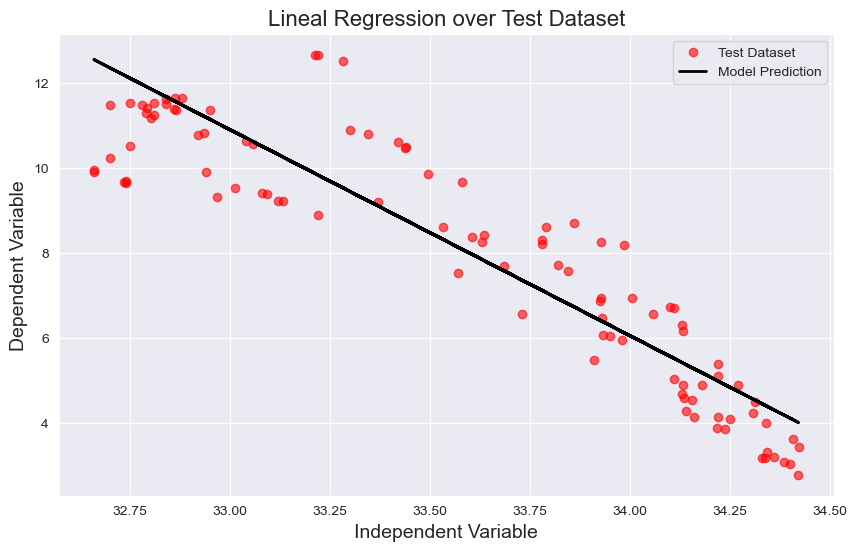

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

##### VISUALIZATION #####
sns.set_style('darkgrid')  # Estilo más atractivo

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Dibujar la dispersión de los datos de prueba
scatter = ax.scatter(X_test, y_test, color='red', label='Test Dataset', alpha=0.6)

# Dibujar la línea de predicción del modelo
line = ax.plot(X_test, dt_predict, color='black', label='Model Prediction', linewidth=2)

# Añadir títulos y etiquetas
ax.set_title('Lineal Regression over Test Dataset', fontsize=16)
ax.set_xlabel('Independent Variable', fontsize=14)
ax.set_ylabel('Dependent Variable', fontsize=14)

# Añadir una leyenda
ax.legend()

# Mostrar la figura
plt.show()


### Histogram of residual
One of the assumption in Linear regression is that the residual should be normally distributed, if your model’s residual is not normally distributed it will not have a bell shaped curve which indicates that your model is not bias and in this case for your dateset regression may not be an appropriate choice.

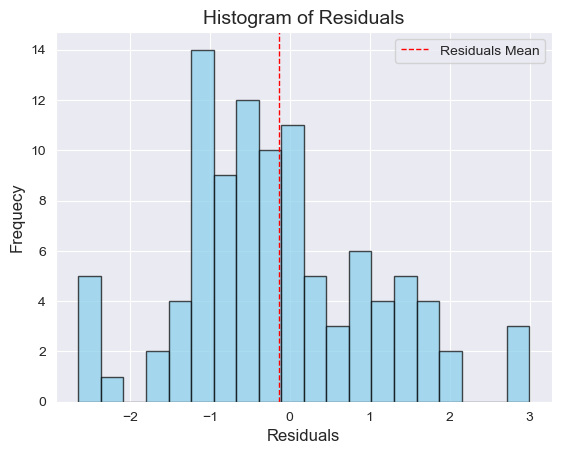

In [24]:
import matplotlib.pyplot as plt

# Calcular los residuos
residuals = y_test - dt_predict

# Crear el histograma de los residuos
plt.hist(residuals, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Añadir etiquetas y título
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequecy', fontsize=12)
plt.title('Histogram of Residuals', fontsize=14)

# Agregar una línea vertical en la media de los residuos
plt.axvline(x=residuals.mean(), color='red', linestyle='dashed', linewidth=1, label='Residuals Mean')
plt.legend()

# Mostrar el histograma
plt.show()


### Residual vs. Fitted Values Plot

In this scatter plot the y axis represents residuals and the x axis represented fitted values or predicted value. This plot is used to detect non-linearity, unequal error variances, and outliers in the model.

For Ideal model, this plot is not supposed to show any pattern. But if any pattern is visible such as curve, U shape then it indicates that there is non-linearity in the data set. (heteroskedasticity)

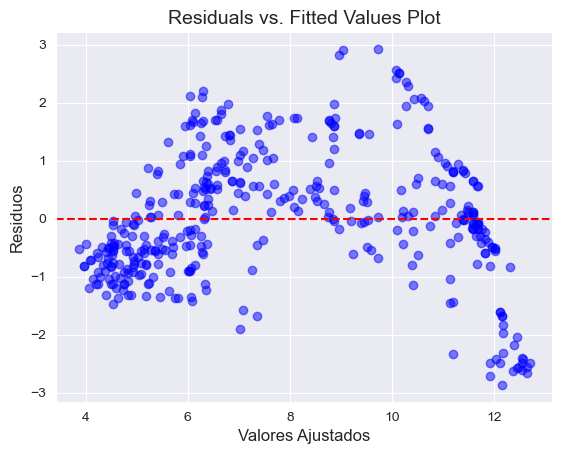

In [25]:
import matplotlib.pyplot as plt

# Calcular los valores ajustados
fitted_values = lin_df.predict(X_train)

# Calcular los residuos
residuals = y_train - fitted_values

# Crear el gráfico de Residuals vs. Fitted Values
plt.scatter(fitted_values, residuals, color='blue', alpha=0.5)

# Añadir una línea horizontal en y=0 para indicar el punto de referencia
plt.axhline(y=0, color='red', linestyle='--')

# Añadir etiquetas y título
plt.xlabel('Valores Ajustados', fontsize=12)
plt.ylabel('Residuos', fontsize=12)
plt.title('Residuals vs. Fitted Values Plot', fontsize=14)

# Mostrar el gráfico
plt.show()


### Normality Q-Q Plot
This plot is used to determine the normal distribution of errors.
For normally distributed data, observations should lie approximately on a straight line. If the data is non-normal, the points form a curve deviating from a straight line which is a problematic situation.

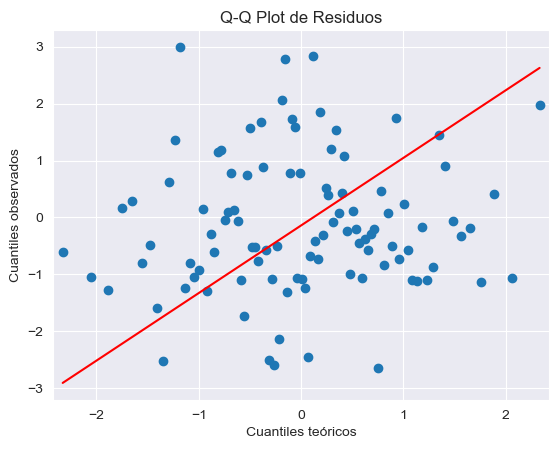

In [26]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Calcular los residuos
residuals = y_test - dt_predict

# Crear el gráfico Q-Q plot
sm.qqplot(residuals, line='s')

# Añadir etiquetas y título
plt.title('Q-Q Plot de Residuos')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles observados')

# Mostrar el gráfico
plt.show()


## Measures

In [15]:
####### MEASURES ######

from tabulate import tabulate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate regression metrics
mae = mean_absolute_error(y_test, dt_predict)
mse = mean_squared_error(y_test, dt_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, dt_predict)

# Create a table
table = [["Mean Absolute Error (MAE)", mae],
         ["Mean Squared Error (MSE)", mse],
         ["Root Mean Squared Error (RMSE)", rmse],
         ["Coefficient of Determination (R²)", r2]]

# Print the table
print(tabulate(table, headers=["Metric", "Value"], tablefmt="fancy_grid"))


print(f"Accuracy score: ",r2*100, "%")

╒═══════════════════════════════════╤══════════╕
│ Metric                            │    Value │
╞═══════════════════════════════════╪══════════╡
│ Mean Absolute Error (MAE)         │ 0.956676 │
├───────────────────────────────────┼──────────┤
│ Mean Squared Error (MSE)          │ 1.42976  │
├───────────────────────────────────┼──────────┤
│ Root Mean Squared Error (RMSE)    │ 1.19573  │
├───────────────────────────────────┼──────────┤
│ Coefficient of Determination (R²) │ 0.827069 │
╘═══════════════════════════════════╧══════════╛
Accuracy score:  82.70686543514778 %
